In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
data0 = pd.read_csv('./data/urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,1,1,1,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,1,0,1,1,0,0,1,0,0


In [138]:
#Checking the shape of the dataset
data0.shape

(2000, 18)

In [139]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [140]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         2000 non-null   object
 1   Have_IP        2000 non-null   int64 
 2   Have_At        2000 non-null   int64 
 3   URL_Length     2000 non-null   int64 
 4   URL_Depth      2000 non-null   int64 
 5   Redirection    2000 non-null   int64 
 6   https_Domain   2000 non-null   int64 
 7   TinyURL        2000 non-null   int64 
 8   Prefix/Suffix  2000 non-null   int64 
 9   DNS_Record     2000 non-null   int64 
 10  Web_Traffic    2000 non-null   int64 
 11  Domain_Age     2000 non-null   int64 
 12  Domain_End     2000 non-null   int64 
 13  iFrame         2000 non-null   int64 
 14  Mouse_Over     2000 non-null   int64 
 15  Right_Click    2000 non-null   int64 
 16  Web_Forwards   2000 non-null   int64 
 17  Label          2000 non-null   int64 
dtypes: int64(17), object(1)
memo

We try to visualize the data by plottings and graphs to find how the data is distributed and the how features are related to each other.

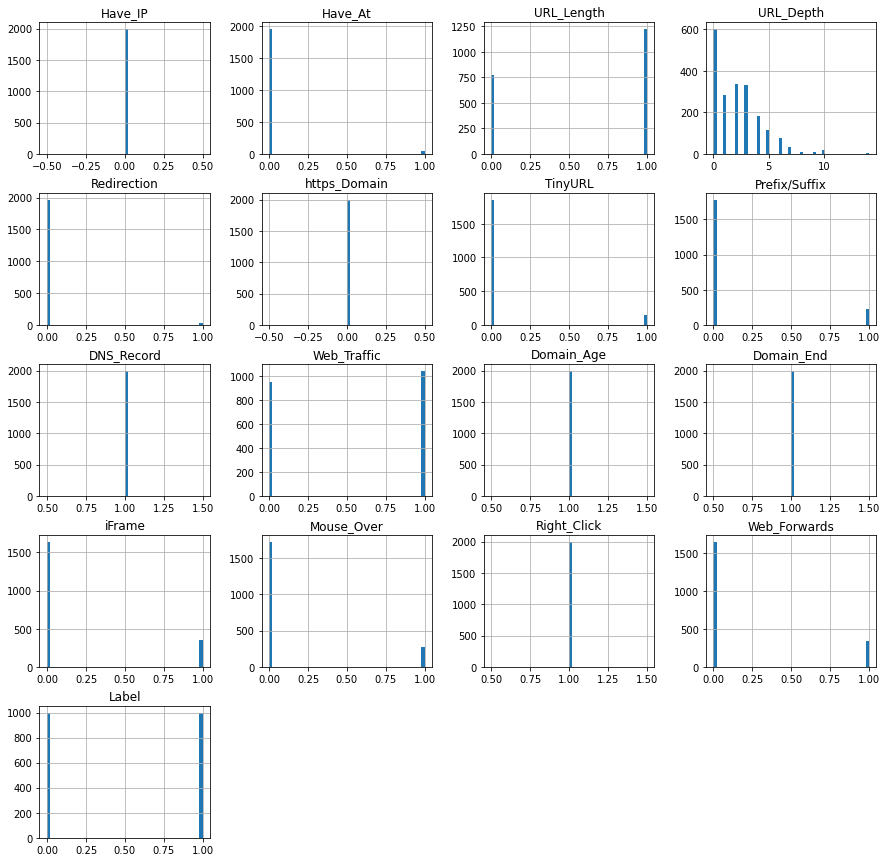

In [141]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

Applying data preprocesssing techniques and transform the data to use it in the models.

In [142]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,2000.0,2000.000000,2000.000000,2000.000000,2000.00000,2000.0,2000.000000,2000.000000,2000.0,2000.000000,2000.0,2000.0,2000.000000,2000.000000,2000.0,2000.000000,2000.000000
mean,0.0,0.020500,0.614000,2.160500,0.01650,0.0,0.071000,0.110000,1.0,0.523000,1.0,1.0,0.178500,0.135000,1.0,0.172500,0.500000
std,0.0,0.141738,0.486952,2.147334,0.12742,0.0,0.256889,0.312968,0.0,0.499596,0.0,0.0,0.383029,0.341809,0.0,0.377909,0.500125
min,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,1.0,0.000000,1.0,1.0,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,1.0,0.000000,1.0,1.0,0.000000,0.000000,1.0,0.000000,0.000000
50%,0.0,0.000000,1.000000,2.000000,0.00000,0.0,0.000000,0.000000,1.0,1.000000,1.0,1.0,0.000000,0.000000,1.0,0.000000,0.500000
75%,0.0,0.000000,1.000000,3.000000,0.00000,0.0,0.000000,0.000000,1.0,1.000000,1.0,1.0,0.000000,0.000000,1.0,0.000000,1.000000
max,0.0,1.000000,1.000000,14.000000,1.00000,0.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000


Except 'Domain' & 'URL_Depth' columns, all other data are either 0 or 1. The Domain column doesnt have any significance to the machine learning model training. So dropping the Domain column from the dataset. 

In [143]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [144]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In the feature extraction file, there has been no shuffling before or after concatination of legit and phishing URLs. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data. 
We need to shuffle to evenly distribute them while splitting into train and test data, as this will remove the case of overfitting while model training.

In [145]:
# shuffling the rows in the dataset
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,1
2,0,0,0,2,0,0,0,0,1,1,1,1,0,0,1,0,1
3,0,0,1,3,0,0,0,0,1,0,1,1,0,0,1,1,0
4,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,1


Now, the data is throughly preprocessed & is ready for training and testing

In [146]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((2000, 16), (2000,))

In [147]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12)
X_train.shape, X_test.shape


((1600, 16), (400, 16))

#### Training
This is a supervised machine learning task. We have classification and regression types.

This data set comes under classification problem, as we have to predict whether the test case is 0 or 1. 
The supervised machine learning models (classification) to be used for training include:
* Decision Tree
* Random Forest
* Multilayer Perceptrons
* XGBoost
* Support Vector Machines
* Convolution Neural networks

In [148]:
#importing packages
from sklearn.metrics import accuracy_score

In [149]:
# Creating holders to store the different models' performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

#### Decision Tree Classifier
A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

In [150]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [151]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [152]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.924
Decision Tree: Accuracy on test Data: 0.922


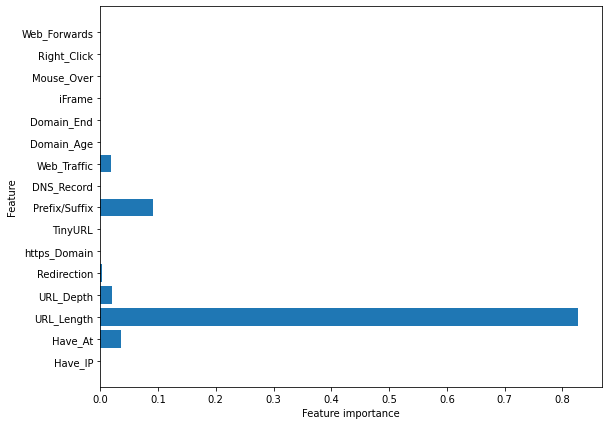

In [153]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [154]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

#### Random Forest Classifier
Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data. It takes the average of subsets of trees formed to improve the predictive accuracy of that dataset

In [155]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [156]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [157]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.926
Random forest: Accuracy on test Data: 0.922


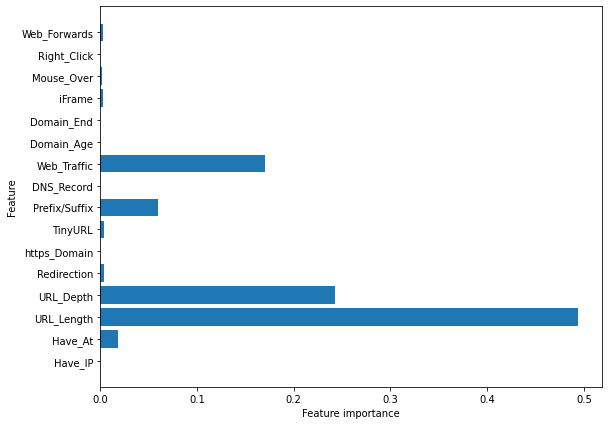

In [158]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [159]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

#### Multilayer Perceptrons (MLPs): Deep Learning
Multilayer perceptrons (MLPs) are also known as just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.  A multi-layer perception is a neural network that has multiple layers. To create a neural network we combine neurons together so that the outputs of some neurons are inputs of other neurons.

In [160]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]), max_iter=500)

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100], max_iter=500)

In [161]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [162]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.937
Multilayer Perceptrons: Accuracy on test Data: 0.930


In [163]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

#### XGBoost Classifier
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. XGBoost is an open-source software library which provides a regularizing gradient boosting framework. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. It yields superior results using less computing resources in the shortest amount of time

In [164]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [165]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [166]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.938
XGBoost : Accuracy on test Data: 0.935


In [167]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

#### Support Vector Machines
In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. 
The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [168]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [169]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [170]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.918
SVM : Accuracy on test Data: 0.925


In [171]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

### Using Convolution Neural networks

In [172]:
import numpy as np
from os import listdir
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

In [173]:
model = tf.keras.models.Sequential()
# this is the initial layer initialization

In [174]:

# model.add(tf.keras.layers.Conv1D(filters=128,kernel_size=9, padding='same', activation='relu', input_shape=(16,))) 
# kernel_initializer = 'he_uniform', kernel_regularizer = None, kernel_constraint = 'MaxNorm', 
model.add(tf.keras.layers.Dense(64, input_shape=(16,), activation = 'relu')) 
model.add(tf.keras.layers.Dropout(0.2))

In [175]:
model.add(tf.keras.layers.Dense(64, kernel_initializer = 'he_uniform', kernel_regularizer = None, kernel_constraint = 'MaxNorm', activation = 'relu')) 
model.add(tf.keras.layers.Dropout(0.2))

In [176]:
model.add(tf.keras.layers.Dense(128, kernel_initializer = 'he_uniform', kernel_regularizer = None, kernel_constraint = 'MaxNorm', activation = 'relu')) 
model.add(tf.keras.layers.Dropout(0.2))

In [177]:
model.add(tf.keras.layers.Dense(64, kernel_initializer = 'he_uniform', kernel_regularizer = None, kernel_constraint = 'MaxNorm', activation = 'relu')) 
model.add(tf.keras.layers.Dropout(0.2))

In [178]:
model.add(tf.keras.layers.Dense(32, kernel_initializer = 'he_uniform', kernel_regularizer = None, kernel_constraint = 'MaxNorm', activation = 'relu')) 
model.add(tf.keras.layers.Dropout(0.45))

In [179]:
model.add(tf.keras.layers.Dense(16, kernel_initializer = 'he_uniform', kernel_regularizer = None, kernel_constraint = 'MaxNorm', activation = 'relu')) 
model.add(tf.keras.layers.Dropout(0.45))


In [180]:
model.add(tf.keras.layers.Flatten())

In [181]:
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [182]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                1088      
                                                                 
 dropout_32 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 64)                4160      
                                                                 
 dropout_33 (Dropout)        (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 128)               8320      
                                                                 
 dropout_34 (Dropout)        (None, 128)               0         
                                                                 
 dense_43 (Dense)            (None, 64)               

In [183]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['acc'])
model.fit(X_train,
         y_train,
         batch_size=1024,
         epochs=100,
         validation_data=(X_test, y_test))
model.save('model_final.h5')

Epoch 1/100
2/2 [==============================] - 2s 375ms/step - loss: 0.7310 - acc: 0.5013 - val_loss: 0.6722 - val_acc: 0.5450
Epoch 2/100
2/2 [==============================] - 0s 54ms/step - loss: 0.7107 - acc: 0.5181 - val_loss: 0.6554 - val_acc: 0.7400
Epoch 3/100
2/2 [==============================] - 0s 54ms/step - loss: 0.6642 - acc: 0.5694 - val_loss: 0.6398 - val_acc: 0.8300
Epoch 4/100
2/2 [==============================] - 0s 54ms/step - loss: 0.6646 - acc: 0.5956 - val_loss: 0.6222 - val_acc: 0.8300
Epoch 5/100
2/2 [==============================] - 0s 61ms/step - loss: 0.6547 - acc: 0.6081 - val_loss: 0.6017 - val_acc: 0.8425
Epoch 6/100
2/2 [==============================] - 0s 54ms/step - loss: 0.6284 - acc: 0.6319 - val_loss: 0.5789 - val_acc: 0.8475
Epoch 7/100
2/2 [==============================] - 0s 55ms/step - loss: 0.6169 - acc: 0.6944 - val_loss: 0.5546 - val_acc: 0.8550
Epoch 8/100
2/2 [==============================] - 0s 55ms/step - loss: 0.5970 - acc: 0.6

In [184]:
score1 = model.evaluate(X_train, y_train, verbose=1)
print('\n', 'Train accuracy:', score1[1])
score2 = model.evaluate(X_test, y_test, verbose=1)
print('\n', 'Test accuracy:', score2[1])


50/50 [==============================] - 0s 5ms/step - loss: 0.2034 - acc: 0.9312

 Train accuracy: 0.9312499761581421
13/13 [==============================] - 0s 4ms/step - loss: 0.2408 - acc: 0.9200

 Test accuracy: 0.9200000166893005


In [185]:
storeResults('Neural Network', score1[1], score2[1])

#### Comparision
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [186]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.924,0.922
1,Random Forest,0.926,0.922
2,Multilayer Perceptrons,0.937,0.930
3,XGBoost,0.938,0.935
4,SVM,0.918,0.925
5,Neural Network,0.931,0.920


In [187]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.938,0.935
2,Multilayer Perceptrons,0.937,0.930
4,SVM,0.918,0.925
1,Random Forest,0.926,0.922
0,Decision Tree,0.924,0.922
5,Neural Network,0.931,0.920


XGBoost Classifier works well with this train dataset.

In [189]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

In [190]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)